# UBER Demand and Supply Gap - Case Study

**Load Libraries**

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

**Load Uber Customer Data**

In [2]:
uberDF = pd.read_csv('Uber Request Data.csv')
uberDF.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
uberDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


** Data Cleaning and Preparation **

In [4]:
uberDF['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [5]:
print('Missing Driver Id Count : ', uberDF['Driver id'].isnull().sum())
print('No Cars Available Count : ', uberDF[uberDF['Status'] == 'No Cars Available'].index.size)

Missing Driver Id Count :  2650
No Cars Available Count :  2650


So there is no missing value in Driver Id column 

In [6]:
print('Missing Drop Time Count : ', uberDF['Drop timestamp'].isnull().sum())
print('Trip Completed Count : ', uberDF[uberDF['Status'] != 'Trip Completed'].index.size)

Missing Drop Time Count :  3914
Trip Completed Count :  3914


Drop timestamp is null for those request which are either 'Cancelled' Or 'No Cab Available' <BR>
So no missing data in this column also

In [7]:
uberDF['Drop timestamp'] = pd.to_datetime(uberDF['Drop timestamp'])
uberDF['Request timestamp'] = pd.to_datetime(uberDF['Request timestamp'])
uberDF.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


Standard Color code for Trip Completed, Cancelled, No Car Available, Airport & City related graph.

In [8]:
colorCode = {'Trip Completed' : sns.xkcd_rgb["medium green"], 
             'Cancelled' : sns.xkcd_rgb["pale red"], 
             'No Cars Available' : sns.xkcd_rgb["amber"],
             'Airport' : sns.xkcd_rgb["blue"],
             'City' : sns.xkcd_rgb["grey"]
            }

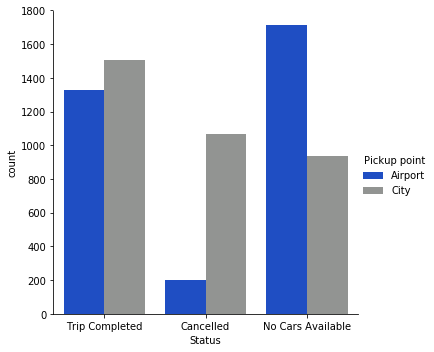

In [9]:
sns.catplot(data=uberDF, kind='count', x='Status', hue='Pickup point', palette=colorCode)
plt.show()

It clearly shows, more cancellation is happening **form City to Airport** drop which might having cascading effect at **Airport**, where cars are not available to came back **from Airport to City**

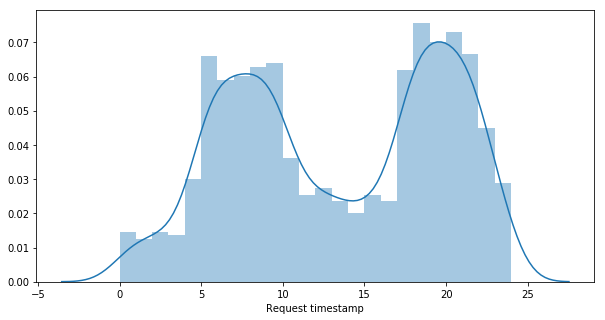

In [10]:
hrs = uberDF['Request timestamp'].dt.hour + uberDF['Request timestamp'].dt.minute / 60
plt.figure(figsize=(10,5))
sns.distplot(hrs, kde=True, bins=24 )
plt.show()

Car booking request trend shows **Bimodal Histogram** with two clear peaks in **morning 6 - 10 AM** and in **evening 6 – 11 PM**

**Categories time on different time slot for the day** <BR>
Early Morning: 12 AM To 5 AM <BR>
Morning: 5 AM To 12 PM <BR>
AfterNoon: 12 PM To 4 PM <BR>
Evening: 4 PM To 8 PM <BR>
Late Evening / Night: 8 PM To 12 AM

In [11]:
def GetTimeofDay(hour):
    if hour >=0 and hour < 5:
        return 'Early Morning'
    elif hour >=5 and hour < 12:
        return 'Morning'
    elif hour >=12 and hour < 16:
        return 'AfternNoon'
    elif hour >=16 and hour < 20:
        return 'Evening'
    else:
        return 'Night'

In [12]:
uberDF['RequestTime_Hour'] = uberDF['Request timestamp'].dt.hour
uberDF['TimeOfDay'] = uberDF['RequestTime_Hour'].apply(lambda x : GetTimeofDay(x))
uberDF.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestTime_Hour,TimeOfDay
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning


In [13]:
timeOfDayOrder = ['Early Morning', 'Morning', 'AfterNoon', 'Evening', 'Night']
timeOfDayLabel = ['Early Morning \n (12 am - 5 am)', 'Morning \n (5 am - 12 pm)', 'AfterNoon \n (12 pm - 4pm)', 'Evening \n (4pm - 8 pm)', 'Night \n (8 pm - 12 am)']

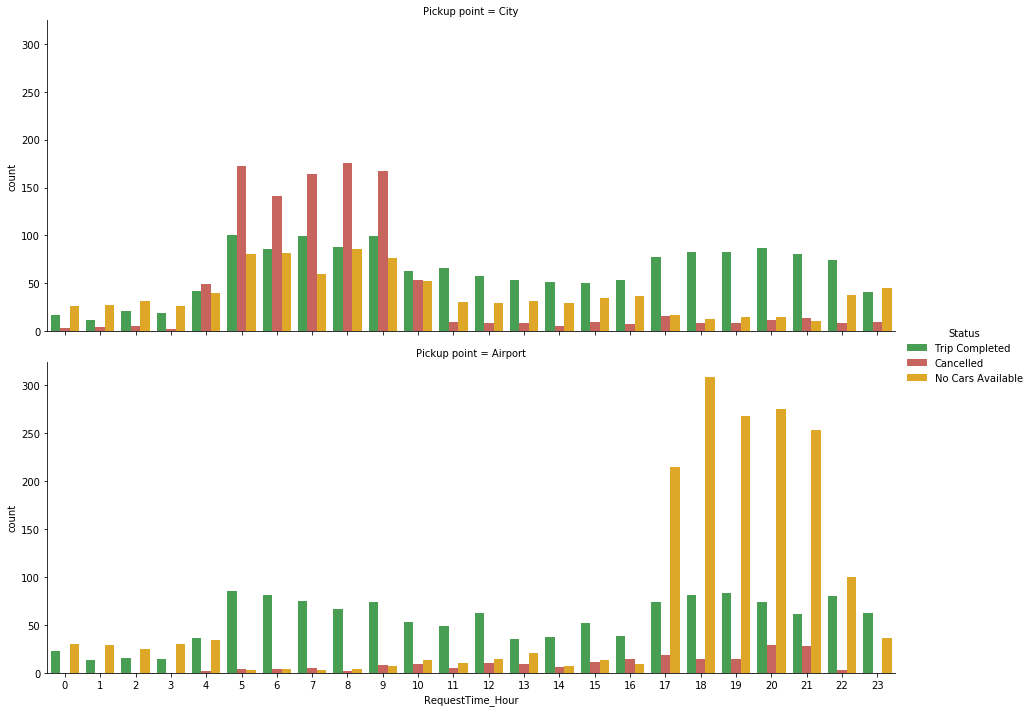

In [14]:
sns.catplot(data=uberDF, x='RequestTime_Hour', kind='count', row='Pickup point', hue='Status', height=5, aspect=2.5, palette=colorCode, row_order=['City','Airport'] )
plt.show()

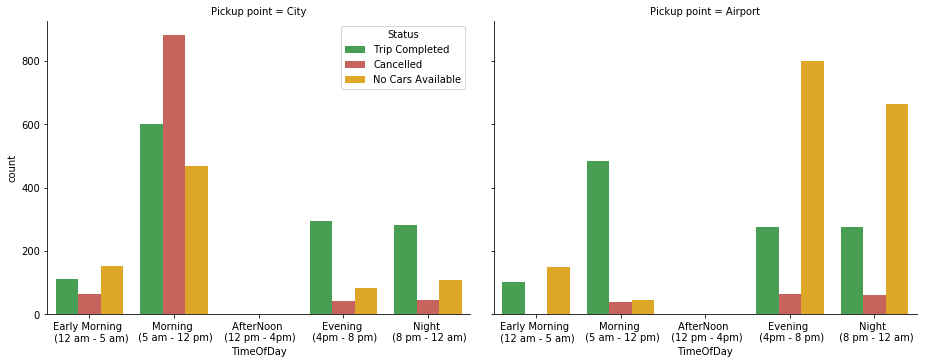

In [15]:
g = sns.catplot(data=uberDF, x='TimeOfDay', kind='count', col='Pickup point', hue='Status', legend_out=False, order=timeOfDayOrder, palette=colorCode,col_order=['City','Airport'])
g.set_xticklabels(timeOfDayLabel)
g.fig.set_size_inches((13,5))
plt.show()

Analyze only problematic areas **Cancellation** and **Car Unavailability**

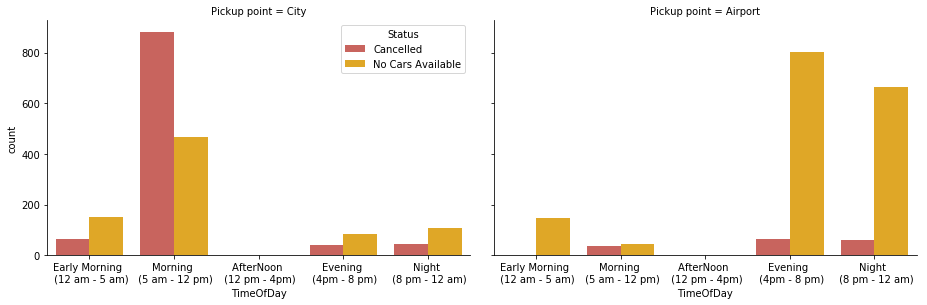

In [16]:
g = sns.catplot(data=uberDF[uberDF['Status'] != 'Trip Completed'], x='TimeOfDay', kind='count', col='Pickup point', hue='Status', order=timeOfDayOrder, palette=colorCode, col_order=['City','Airport'], legend_out=False)
g.set_xticklabels(timeOfDayLabel)
g.fig.set_size_inches((13,4))
plt.show()

In [17]:
tempDF= uberDF.pivot_table(values='Request id', aggfunc='count', index=['Pickup point', 'RequestTime_Hour', 'TimeOfDay'], columns='Status')
tempDF.fillna(value=0, inplace=True)
tempDF['Demand'] = tempDF['Cancelled'] + tempDF['No Cars Available'] + tempDF['Trip Completed']
tempDF['SupplyDemandGap%'] = round(((tempDF['Demand'] - tempDF['Trip Completed']) / tempDF['Demand']) * 100, 2)
tempDF.reset_index(inplace=True)
tempDF.head()

Status,Pickup point,RequestTime_Hour,TimeOfDay,Cancelled,No Cars Available,Trip Completed,Demand,SupplyDemandGap%
0,Airport,0,Early Morning,0.0,30.0,23.0,53.0,56.60
1,Airport,1,Early Morning,0.0,29.0,13.0,42.0,69.05
2,Airport,2,Early Morning,0.0,25.0,16.0,41.0,60.98
3,Airport,3,Early Morning,0.0,30.0,15.0,45.0,66.67
4,Airport,4,Early Morning,2.0,34.0,36.0,72.0,50.00


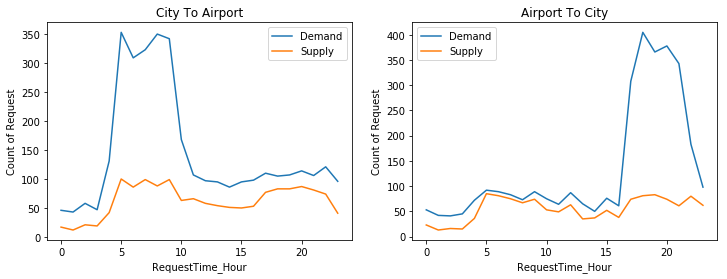

In [18]:
plt.figure(figsize=(12,4), )
ax1 = plt.subplot(1,2,1)

sns.lineplot(data=tempDF[tempDF['Pickup point'] == 'City'], x='RequestTime_Hour', y='Demand', ax=ax1, label='Demand')
sns.lineplot(data=tempDF[tempDF['Pickup point'] == 'City'],  x='RequestTime_Hour', y='Trip Completed', ax=ax1, label='Supply')
ax1.set_ylabel('Count of Request')
ax1.set_title('City To Airport')

ax2 = plt.subplot(1,2,2)

sns.lineplot(data=tempDF[tempDF['Pickup point'] == 'Airport'], x='RequestTime_Hour', y='Demand', ax=ax2 , label='Demand')
sns.lineplot(data=tempDF[tempDF['Pickup point'] == 'Airport'],  x='RequestTime_Hour', y='Trip Completed', ax=ax2, label='Supply')
ax2.set_title('Airport To City')
ax2.set_ylabel('Count of Request')

plt.show()

Huge gap between demand and supply of cars in morning hours (5 am - 10 am) **form City to Aiport** travel,<BR>
on other hand simillar trend in evening & night hours (5 pm- 23 pm) **from Airport to City** travel.


In [19]:
tempDF.sort_values(by='SupplyDemandGap%', ascending=False).iloc[0:10]

Status,Pickup point,RequestTime_Hour,TimeOfDay,Cancelled,No Cars Available,Trip Completed,Demand,SupplyDemandGap%
21,Airport,21,Night,28.0,254.0,61.0,343.0,82.22
20,Airport,20,Night,29.0,275.0,74.0,378.0,80.42
18,Airport,18,Evening,15.0,309.0,81.0,405.0,80.00
19,Airport,19,Evening,15.0,268.0,83.0,366.0,77.32
17,Airport,17,Evening,19.0,215.0,74.0,308.0,75.97
32,City,8,Morning,176.0,86.0,88.0,350.0,74.86
30,City,6,Morning,141.0,82.0,86.0,309.0,72.17
25,City,1,Early Morning,4.0,27.0,12.0,43.0,72.09
29,City,5,Morning,172.0,81.0,100.0,353.0,71.67
33,City,9,Morning,167.0,76.0,99.0,342.0,71.05


Here we are able to see two trends
<ul>
    <li>**Airpot To City:** There is huge gap in demand and supply of cars, mostly because of **No cars Available** </li>
    <li>**City To Airport:** As compare to Airport pickup, City pickup demand and supply gap is less, but this gap is because of booking **Cancellation** from driver. </li>
</ul>

Highest gap in demand and supply of uber cars is for **Airport to City** travel. <BR>
Majorly in **Night** and **Evening** time slots. <BR>
The highest gap at **9 PM** which is **82.22%** where total cab request was **343** and only **61** request get fulfilled. <BR><BR>

Analyze based on average travel time for specific hours to check if traffic condition impacting cars cancellation or cars availability. 

In [20]:
uberDF['TravelTimeInMinutes'] = round((uberDF['Drop timestamp'] - uberDF['Request timestamp']).dt.seconds / 60,0)
uberDF.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestTime_Hour,TimeOfDay,TravelTimeInMinutes
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning,69.0
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,50.0
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning,41.0
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,55.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Morning,53.0


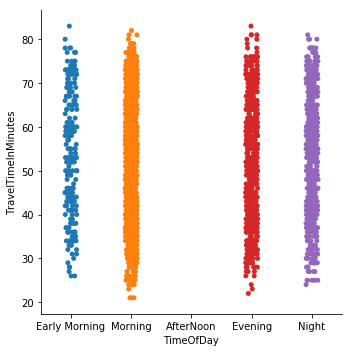

In [21]:
sns.catplot(data=uberDF.dropna(subset=['TravelTimeInMinutes']), x='TimeOfDay', y='TravelTimeInMinutes', order=timeOfDayOrder)
plt.show()

In [22]:
uberDF.groupby(by='RequestTime_Hour').mean()['TravelTimeInMinutes'].describe()

count    24.000000
mean     52.619961
std       1.490800
min      50.539326
25%      51.521369
50%      52.547141
75%      53.418673
max      57.480000
Name: TravelTimeInMinutes, dtype: float64

Average travel time is **53 Minutes** with **1.5 Minutes** of standard deviation. <BR>
So it looks like travel time not impacting booking cancellation and car availability.

In [23]:
uberDF.to_csv('UberDF.csv', index=False)

**Reason for the demand supply gap**

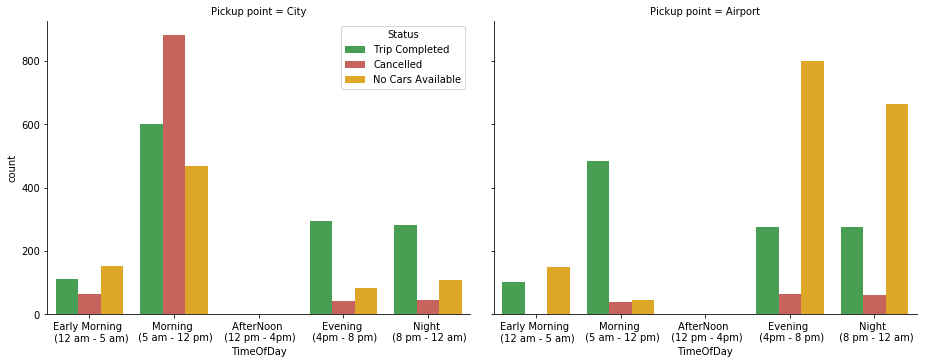

In [24]:
g = sns.catplot(data=uberDF, x='TimeOfDay', kind='count', col='Pickup point', hue='Status', legend_out=False, order=timeOfDayOrder, palette=colorCode,col_order=['City','Airport'])
g.set_xticklabels(timeOfDayLabel)
g.fig.set_size_inches((13,5))
plt.show()

**City To Airport:** 
<ul>
<li>There are lot of requests are cancelled by driver in morning session, also throughout the day very few request from City to airport, so less cars moving towards airport.</li>
<li>There are very few car booking request from Airport to City in morning hours this is one of the reason drivers cancelling there airport drop request in morning hours. </li>
</ul>

**Airport To City:** 
<ul>
<li>
    Throughout the day there are less demand for Airport pickup, so drivers are not accepting airport drop from city.
</li>
<li>
    But in late evening and night hours sudden increase in demand at airport but cars are not available because of very few cars moving from City to airport.
</li>
</ul>
